<a href="https://colab.research.google.com/github/SEBINorSEBOUT/Sunhyungdae_math_2/blob/main/%EC%84%A0%EB%8C%80%207%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

lamen = dict({'name':['쇠고기라면','해물라면','얼큰라면','떡라면','짬뽕라면','만두라면','치즈라면','된장라면','볶음라면','김치라면'],'noodle':[2,1,5,2,3,4,4,1,3,5],'bowl':[4,5,3,2,5,3,4,2,3,5],'soup':[5,1,4,3,5,2,3,1,2,3]})

lamen

lamen1 = pd.DataFrame(lamen)
lamen1

,name,noodle,bowl,soup
0,쇠고기라면,2,4,5
1,해물라면,1,5,1
2,얼큰라면,5,3,4
3,떡라면,2,2,3
4,짬뽕라면,3,5,5
5,만두라면,4,3,2
6,치즈라면,4,4,3
7,된장라면,1,2,1
8,볶음라면,3,3,2
9,김치라면,5,5,3


In [4]:
#1.데이터분리
lamenEval = lamen1[['noodle','bowl','soup']]
lamenName = lamen1['name']

#2.스케일러로 값 변환
#scaling using StandardScaler

scaler= StandardScaler()
scaler.fit(lamenEval.values)
lamen_scaled=scaler.transform(lamenEval.values)

lamen_scaled.shape
#(10,3)

#3.PCA모델링
#-PCA.fit():주성분찾음
#-PCA.transform():새로운 주성분으로 데이터변환
#PCA modelling
from sklearn.decomposition import PCA

pca_lamen=PCA()
pca_lamen.fit(lamen_scaled)

#data transform
X_pca_lamen = pca_lamen.transform(lamen_scaled)

#look into data shape
print("original data : {}".format(str(lamen_scaled.shape)))
print("transform data : {}".format(str(X_pca_lamen.shape)))

#original data : (10,3) trasnform data :(10,3)

original data : (10, 3)
transform data : (10, 3)


In [5]:
pca_lamen.components_

array([[-0.571511  , -0.52211611, -0.63306393],
       [-0.60447096,  0.78960694, -0.105526  ],
       [-0.5549685 , -0.32235949,  0.76687308]])

In [6]:
#PCA 1,2,3 에 대한 변환 스코어
pc1=0
pc2=0
pc3=0

for j in range(len(pca_lamen.components_)):
  pc1 +=pca_lamen.components_[0][j]*lamen_scaled[:,j]
  pc2 +=pca_lamen.components_[1][j]*lamen_scaled[:,j]
  pc3 +=pca_lamen.components_[2][j]*lamen_scaled[:,j]

pc1 = pc1.reshape(10,1)
pc2 = pc2.reshape(10,1)
pc3 = pc3.reshape(10,1)

np.round(np.hstack((pc1,pc2,pc3)),3)==np.round(X_pca_lamen,3)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [7]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


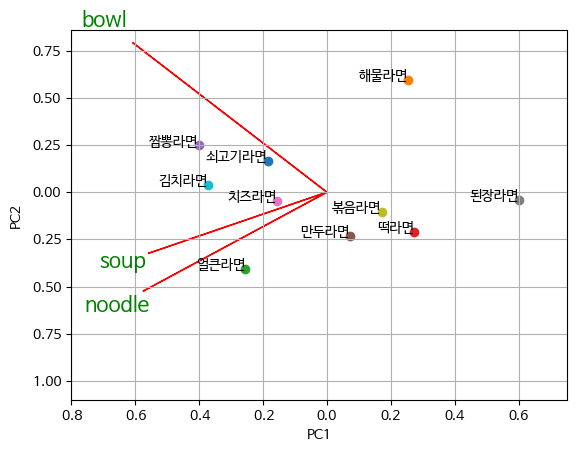

In [9]:
#시각적으로 확인하고 싶을 때

def biplot2(score, coeff, label, pcax, pcay, labels=None):
  pca1=pcax-1
  pca2=pcay-1
  xs=score[:,pca1]
  ys=score[:,pca2]
  n=score.shape[1]
  scalex = 1.0/(xs.max()-xs.min())
  scaley = 1.0/(ys.max()-ys.min())

  for i in range(len(xs)):
    plt.scatter(xs[i]*scalex, ys[i]*scaley)
    plt.annotate(label.iloc[i], xy = (xs[i]*scalex, ys[i]*scaley), ha='right')

  for i in range(n):
    plt.arrow(0,0,coeff[i,pca1], coeff[i,pca2],color='r',alpha=1)
    if labels is None:
      plt.text(coeff[i,pca1]*1.15,coeff[i,pca2]*1.15,"Var"+str(i+1),color='g',ha='center',va='center')
    else:
      plt.text(coeff[i,pca1]*1.15,coeff[i,pca2]*1.15,labels[i],color='g',ha='center',va='center', size=15)
  plt.xlim(-0.8,0.75)
  plt.ylim(-1.1)
  plt.xlabel("PC{}".format(pcax))
  plt.ylabel("PC{}".format(pcay))
  plt.grid()

#한글폰트설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font',family='NanumBarunGothic')
%matplotlib inline
biplot2(X_pca_lamen,pca_lamen.components_,lamenName,1,2,labels=lamenEval.columns)






Iris data set : 150 records with 5 attributes

First 5 records in iris data
    sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

First principal axis: [ 0.52237162 -0.26335492  0.58125401  0.56561105]
Second principal axis: [0.37231836 0.92555649 0.02109478 0.06541577]

First 5 Transformed records
    principal component 1  principal component 2       target
0              -2.264542               0.505704  Iris-setosa
1              -2.086426              -0.655405  Iris-setosa
2              -2.367950              -0.318477  Iris-setosa
3              -2.304197              -0.575368  Iris-setosa
4              -2.388777        

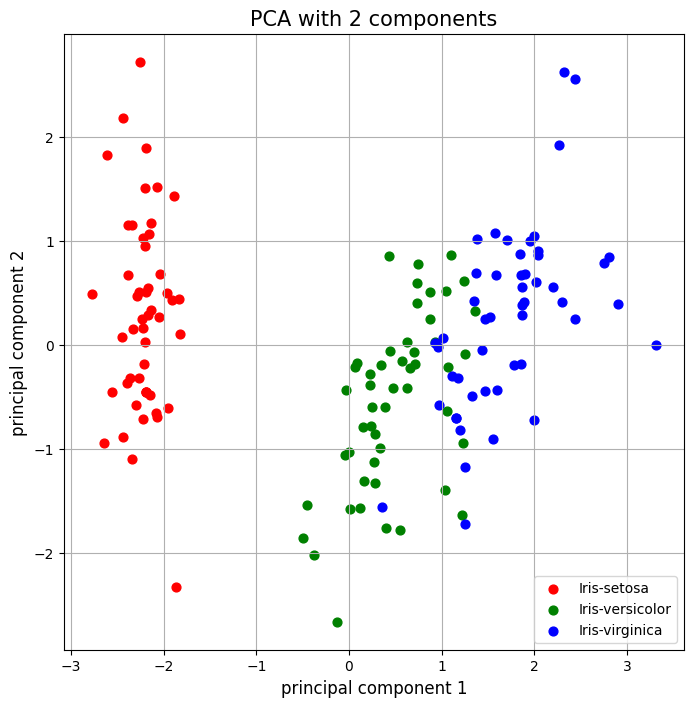

In [7]:
#ex03_pca
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

# iris 데이터의 위치 URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Pandas DataFrame으로 읽어들이기
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

nrow, ncol = df.shape
print("Iris data set :", nrow, "records with", ncol, "attributes\n")
print("First 5 records in iris data\n", df.head(5))
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values # 데이터의 속성값
y = df.loc[:,['target']].values # 데이터의 부류
x = StandardScaler().fit_transform(x) # 평균 0, 분산 1인 데이터로 변환

pca = PCA(n_components=2) # PCA를 적용하여 2개의 주성분만 추출
principalComponents = pca.fit_transform(x)
# 주성분 축 2개를 이용하여 2차원 데이터로 변환
print("\nFirst principal axis:", pca.components_[0])
print("Second principal axis:", pca.components_[1])

principalDf = pd.DataFrame(data = principalComponents,
              columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

print("\nFirst 5 Transformed records\n", finalDf.head(5))
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('principal component 1', fontsize = 12)
ax.set_ylabel('principal component 2', fontsize = 12)
ax.set_title('PCA with 2 components', fontsize = 15)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] # iris 데이터의 부류 이름
colors = ['r', 'g', 'b'] # 부류별로 지정된 색상
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
      , finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 40)
ax.legend(targets)
ax.grid()
fig.show()
